In [2]:
#Lecture 46 Category Data Type 

In [3]:
import pandas as pd 
import os

In [4]:
os.getcwd()

'C:\\Users\\chida'

In [5]:
movies = pd.read_csv(r"C:\Users\chida\Desktop\Data Science A-Z\Section 6\Movie-Ratings.csv")

In [6]:
len(movies)

559

In [7]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.columns 

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'BudgetMillions', 'Year']

In [10]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
###change the category of year, film and genre # have to specify them manually
#movies["Film"]
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

In [12]:
movies.info() ###this is the structure that i missed in the homework 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetMillions     559 non-null int64
Year               559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
movies.describe()

,CriticRatings,AudienceRatings,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [14]:
gen1 = movies.Genre.cat.categories
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [15]:
#################################

In [16]:
#####Lecture 47 working with joint plots############ 

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [18]:
####jointplots

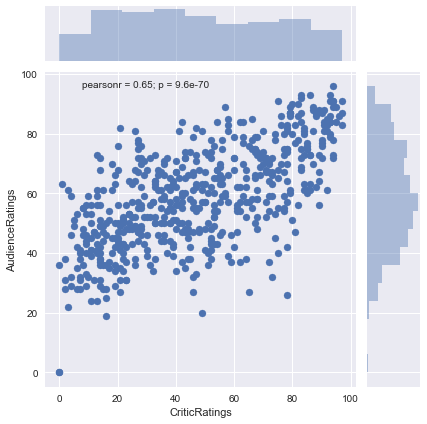

In [19]:
j = sns.jointplot(data=movies, x="CriticRatings", y="AudienceRatings")

In [20]:
#scatterplot above shows you the relation between audience and critic rating

##insights:audience is more forgiving to movies 

##shows you this for both the x and y data

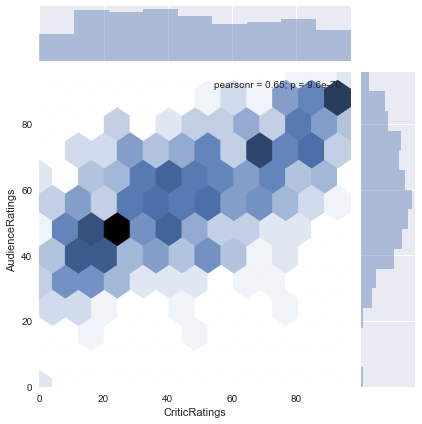

In [21]:
#chart 1
j1 = sns.jointplot(data=movies, x="CriticRatings", y="AudienceRatings", kind = 
                  "hex")

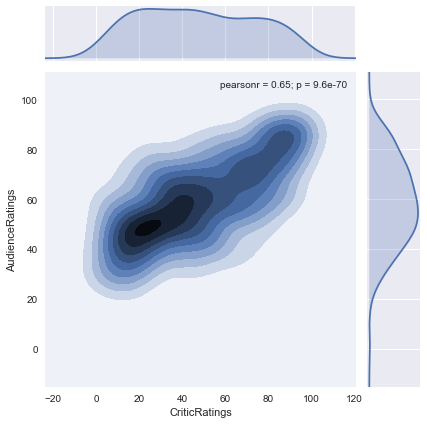

In [22]:
j2 = sns.jointplot(data=movies, x="CriticRatings", y="AudienceRatings", kind = 
                  "kde")

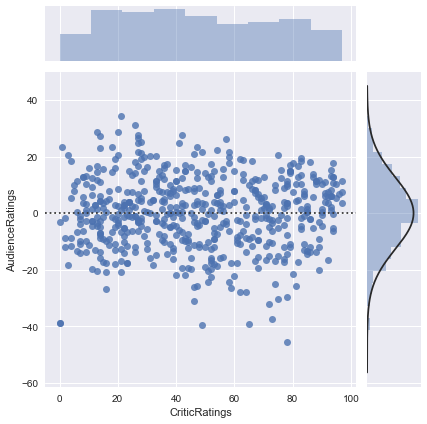

In [23]:
j3 = sns.jointplot(data=movies, x="CriticRatings", y="AudienceRatings", kind = 
                  "resid")

In [24]:
####lecture 48 histograms 

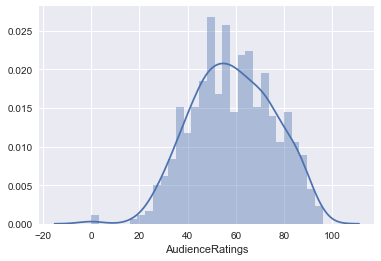

In [25]:
###already know this method 
m1 = sns.distplot(movies.AudienceRatings, bins = 30)

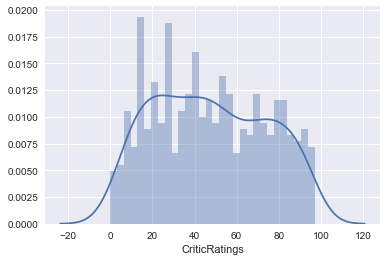

In [26]:
sns.set_style("darkgrid")
m2 = sns.distplot(movies.CriticRatings, bins = 30)

In [27]:
####in py plot the histogram would look like this. seaborn works ontop of py plot

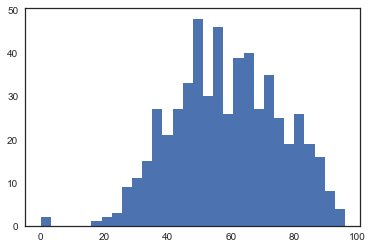

In [28]:
sns.set_style("white")
n1 = plt.hist(movies.AudienceRatings, bins = 30)

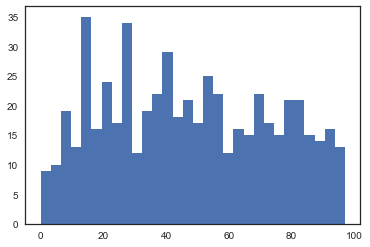

In [29]:
n2 = plt.hist(movies.CriticRatings, bins = 30)

In [30]:
###lecture 49 stacked histogram 
movies[movies.Genre == "Drama"].BudgetMillions

10      30
11      20
13       7
18       8
23      20
26       8
27      30
47      13
53      26
55       2
56      55
62      55
74      15
84      25
96      37
99      25
112     60
116     21
117      5
119     31
120     40
128      1
131     24
132     21
151     33
158     16
171      7
195     15
199     35
213     10
      ... 
437     13
442     20
444      2
445     20
446     40
450     65
457     40
466     45
467     11
470     60
480     39
482     32
483     68
484     50
487      0
488      4
489    150
490     16
492     25
508     20
509     10
511      2
516     25
523     26
527     70
529     66
532     38
534     21
541     15
545      2
Name: BudgetMillions, Length: 101, dtype: int64

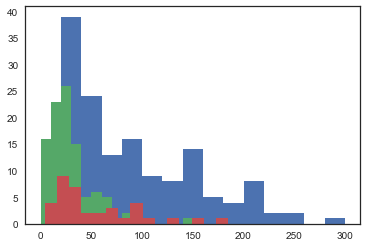

In [31]:
plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins = 15)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions, bins = 15)
#plt.hist(movies.BudgetMillions)
plt.show()

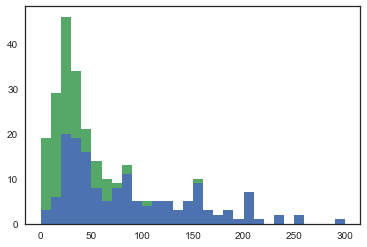

In [32]:
###we actually want to create a chart where they are all stacked up 

stackedData = [movies[movies.Genre == "Action"].BudgetMillions, movies[movies.Genre == "Drama"].BudgetMillions]
plt.hist(stackedData,bins =30, stacked = True)
plt.show()

In [33]:
####want to create a loop to make all specific list for each genre

In [34]:
#test
for gen in gen1:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


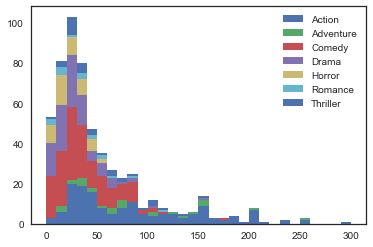

In [35]:
list1 = []
mylabels = []


for gen in gen1:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1,bins =30, stacked = True, rwidth =1, label = mylabels)
plt.legend()
plt.show()

In [36]:
###chart 4

In [37]:
####Lecture 50 KDE plot 

In [38]:
#KDE = Kernal Density Estimate

In [39]:
##visualise audience versus critic rating 

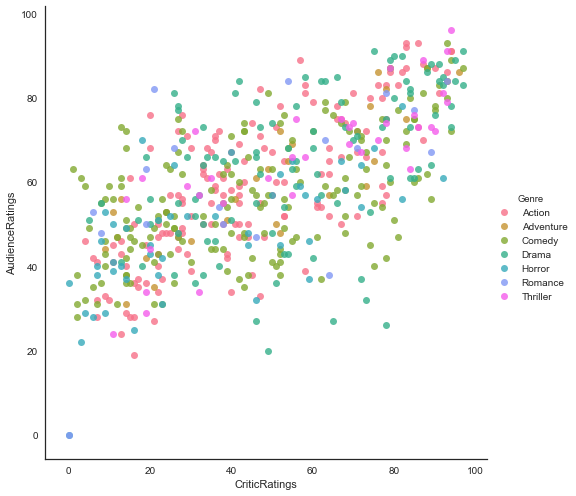

In [40]:
vis11 = sns.lmplot(data = movies, x = "CriticRatings", y = "AudienceRatings", \
                  fit_reg=False, hue = "Genre", size=7, aspect=1)

In [41]:
###look through the seaborn gallery and see what styles they have that would suit the work that im doing

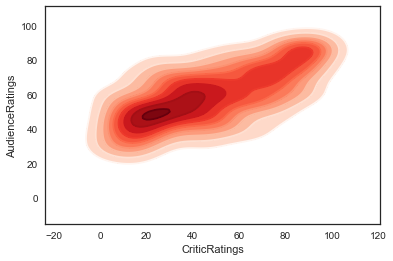

In [42]:
##shows where the most density is in the chart 
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, \
                shade=True, shade_lowest = False, cmap = "Reds")
#below is justthe border
k1b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, \
                cmap = "Reds")

In [43]:
####Lecture 51
#working with subplots() allows you to create more sophisticated visuals

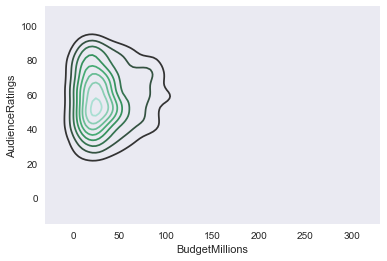

In [44]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings)

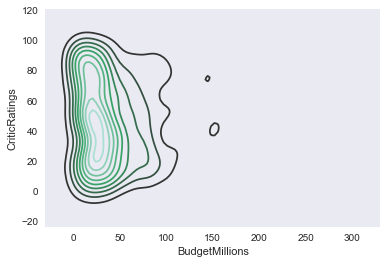

In [45]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings)

In [46]:
###what is a subplot?

[(-20, 140)]

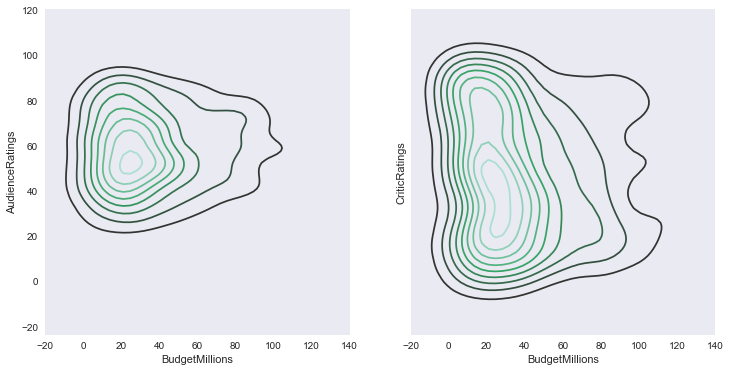

In [47]:
f, axis = plt.subplots(1,2, figsize=(12,6),sharex = True, sharey = True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axis[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axis[1])
k1.set(xlim=(-20,140))

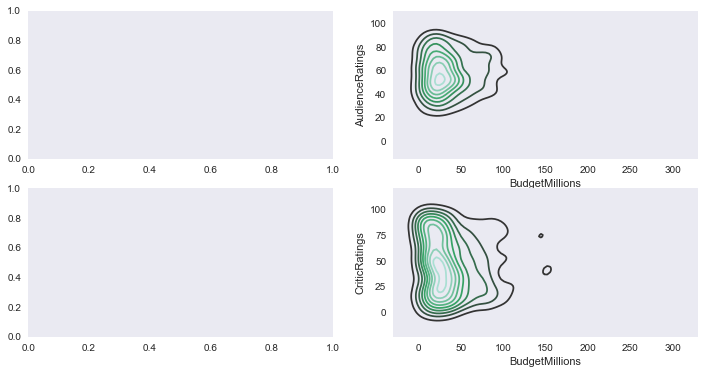

In [48]:
###this requires a 2d arrayto specifythe location
f, axis = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axis[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axis[1,1])

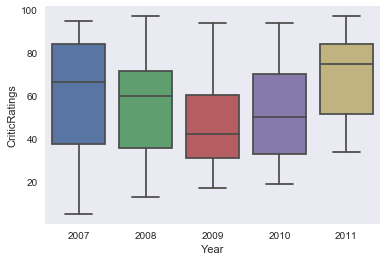

In [49]:
###########Lecture 52 violinplots vs boxplots
#w = sns.boxplot(data=movies,x="Genre", y="CriticRatings")
w = sns.boxplot(data=movies[movies.Genre == "Drama"],x="Year", y="CriticRatings")

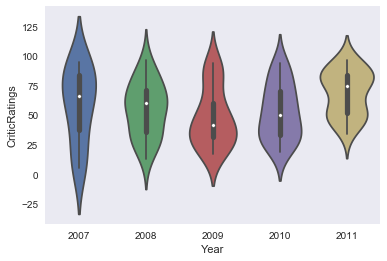

In [50]:
#z = sns.violinplot(data=movies,x="Genre", y="CriticRatings")
z = sns.violinplot(data=movies[movies.Genre == "Drama"],x="Year", y="CriticRatings")

In [51]:
#####violin plots give youmore information
######box plots split into quarters

##restart at 6 mins


In [52]:
####lecture 53
#facet grids 

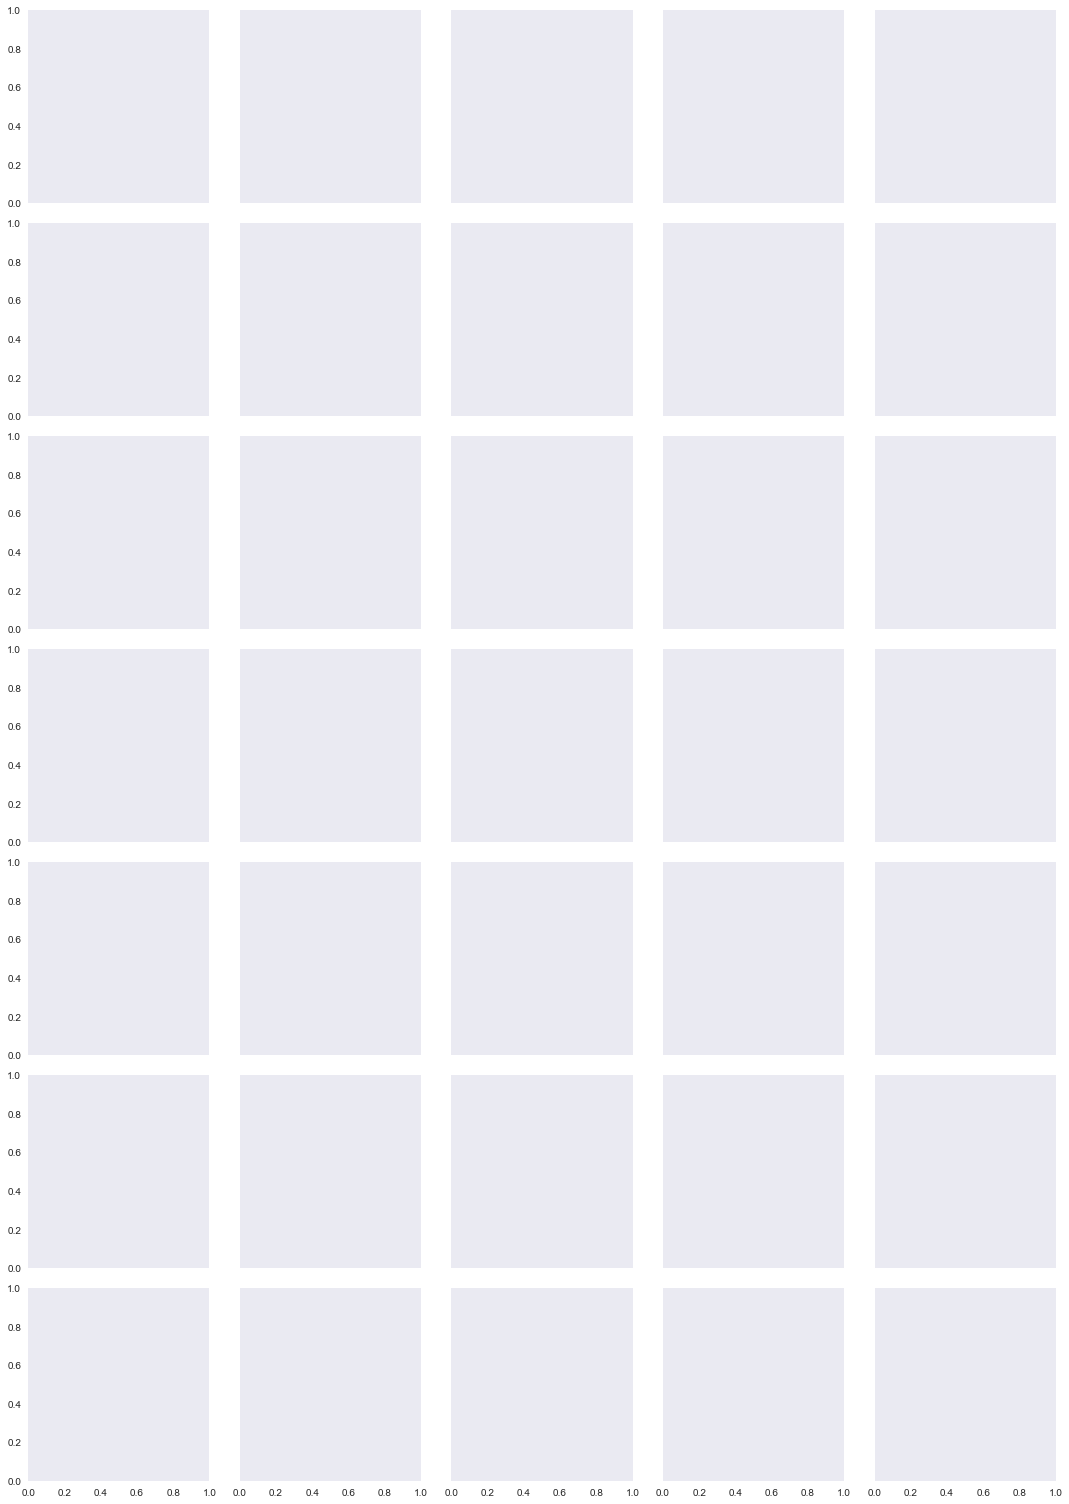

In [53]:
#g = sns.FacetGrid(movies, row= "Genre", hue = "Genre")
g = sns.FacetGrid(movies, row= "Genre", col = "Year", hue = "Genre")

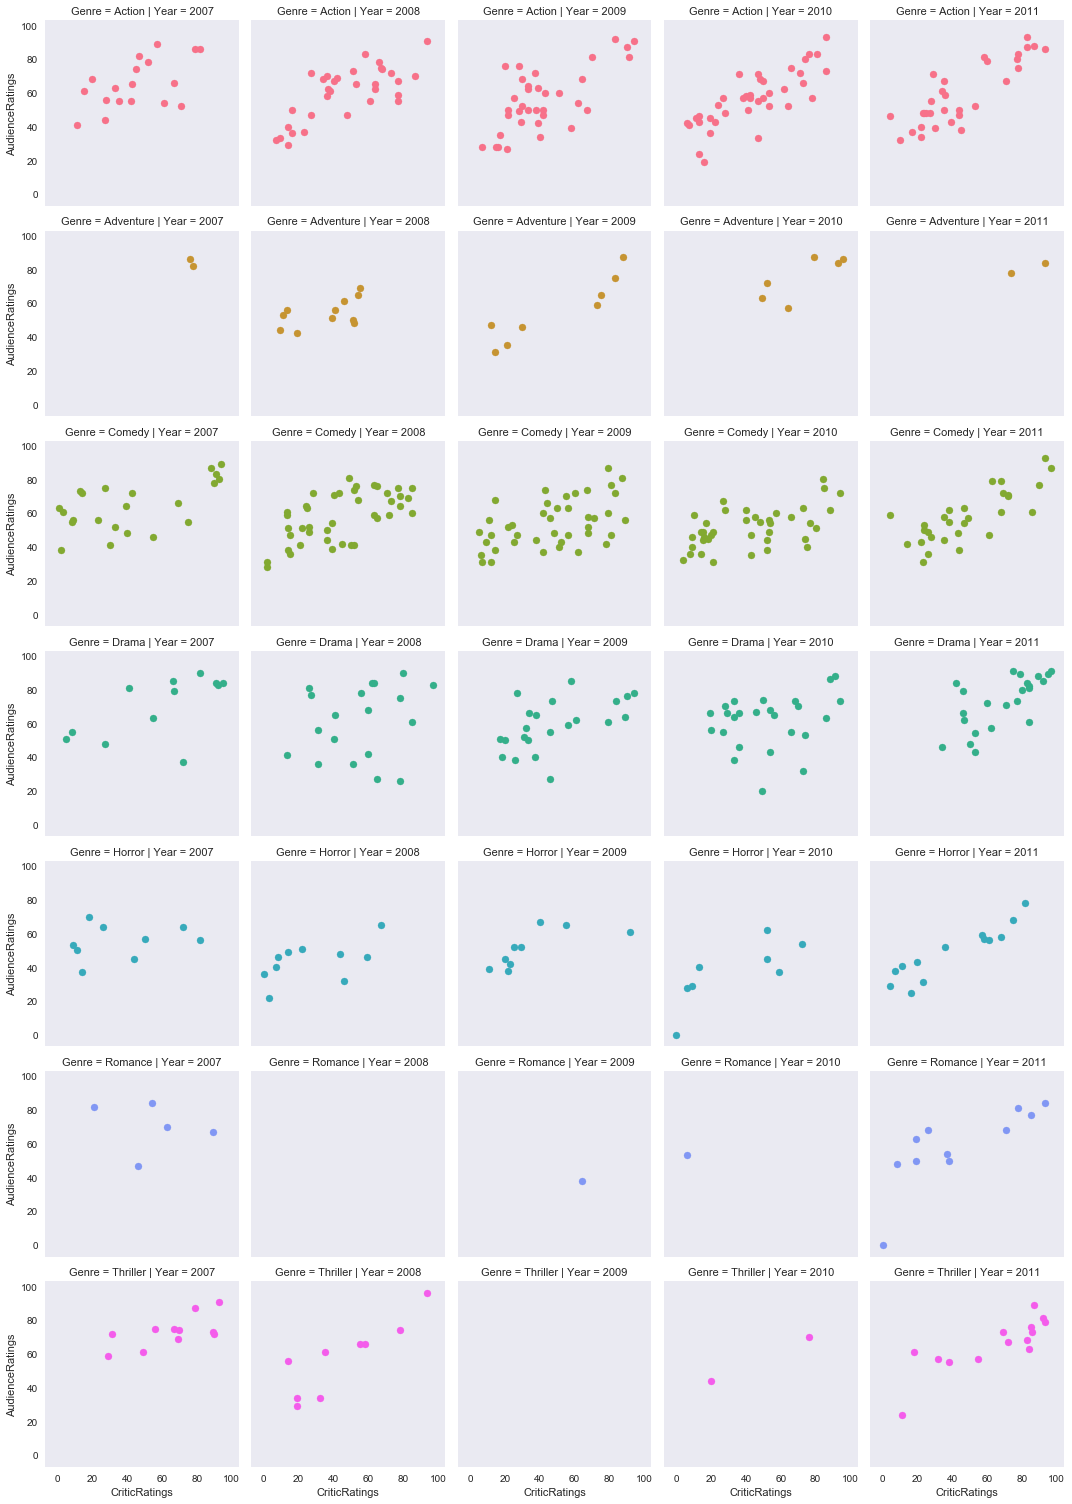

In [54]:
g = sns.FacetGrid(movies, row= "Genre", col = "Year", hue = "Genre")
g =  g.map(plt.scatter, "CriticRatings", "AudienceRatings")


In [55]:
###you can populate the grid with nearly any type of chart 

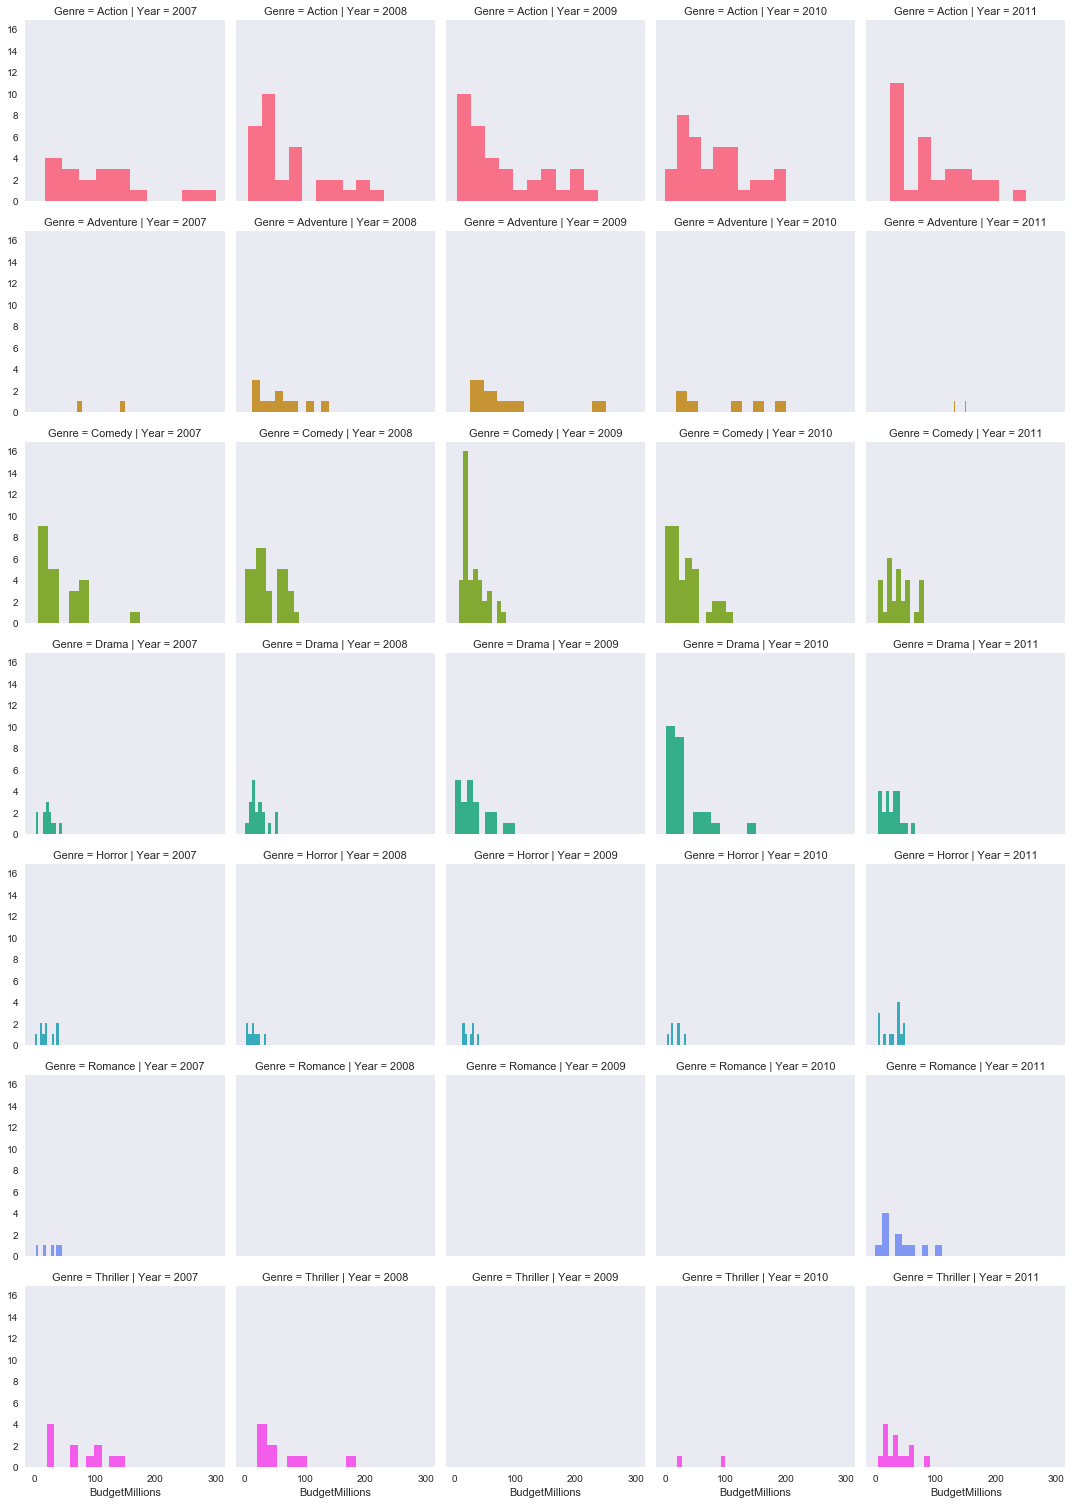

In [56]:
g = sns.FacetGrid(movies, row= "Genre", col = "Year", hue = "Genre")
g =  g.map(plt.hist, "BudgetMillions")


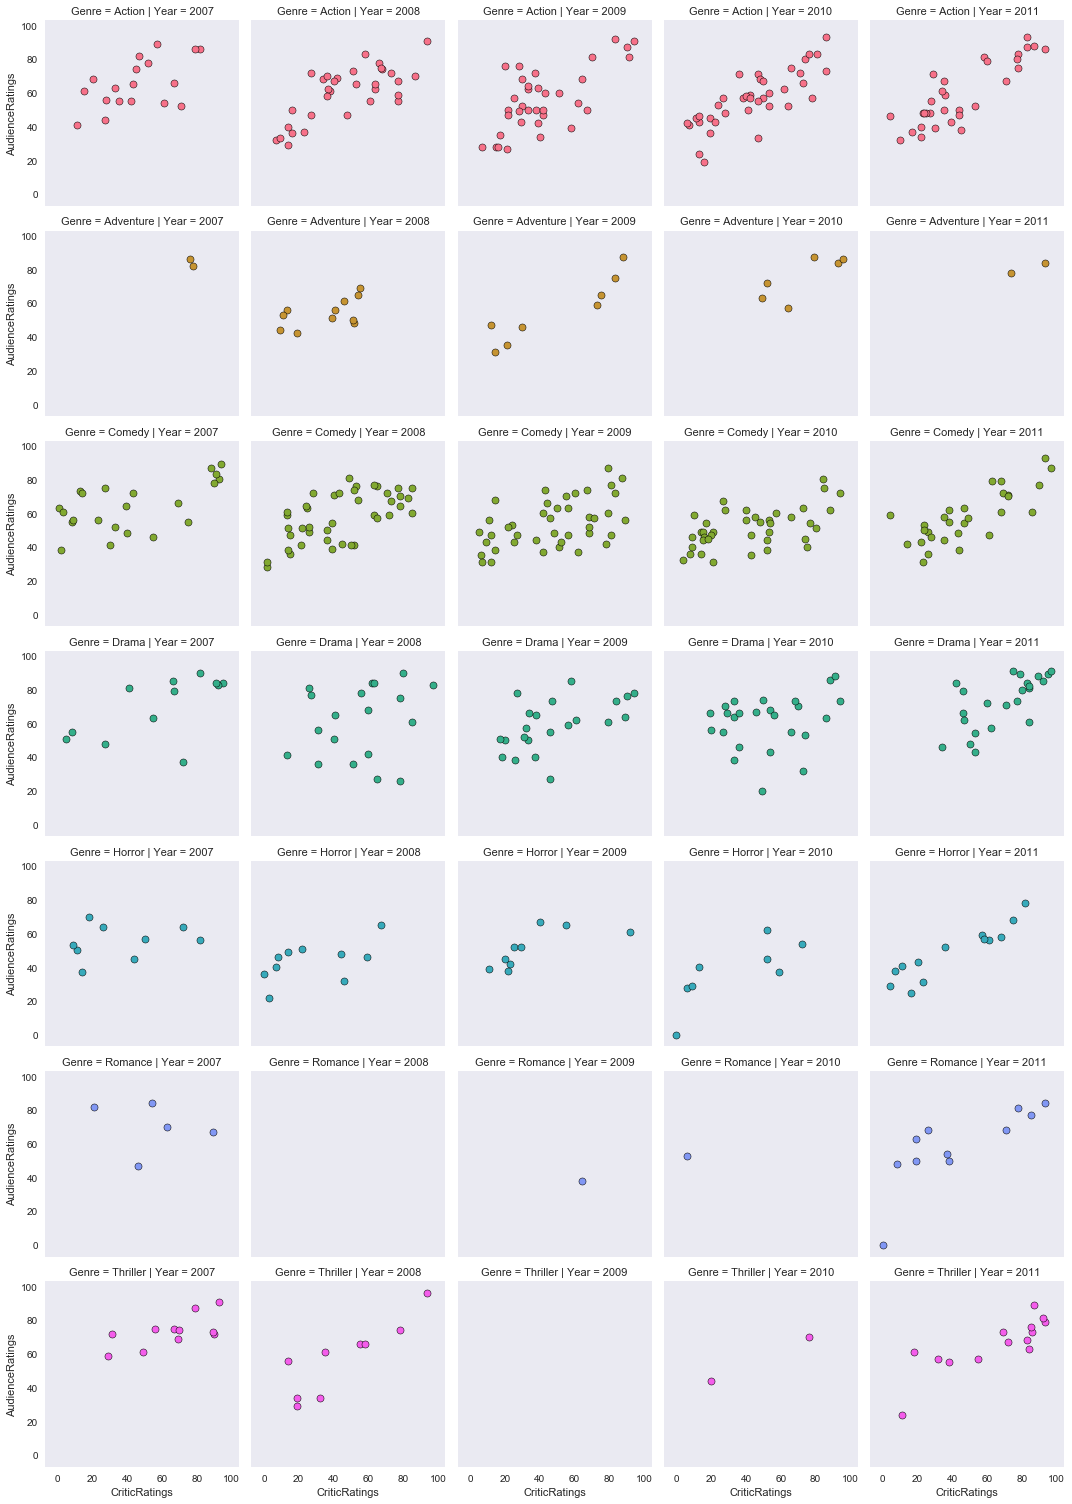

In [57]:
#Back to the scatter plot - add one more argument 
g = sns.FacetGrid(movies, row= "Genre", col = "Year", hue = "Genre")
kws = dict(s=50, linewidth = 0.5, edgecolor = "black")
g =  g.map(plt.scatter, "CriticRatings", "AudienceRatings", **kws)

In [58]:
kws

{'edgecolor': 'black', 'linewidth': 0.5, 's': 50}

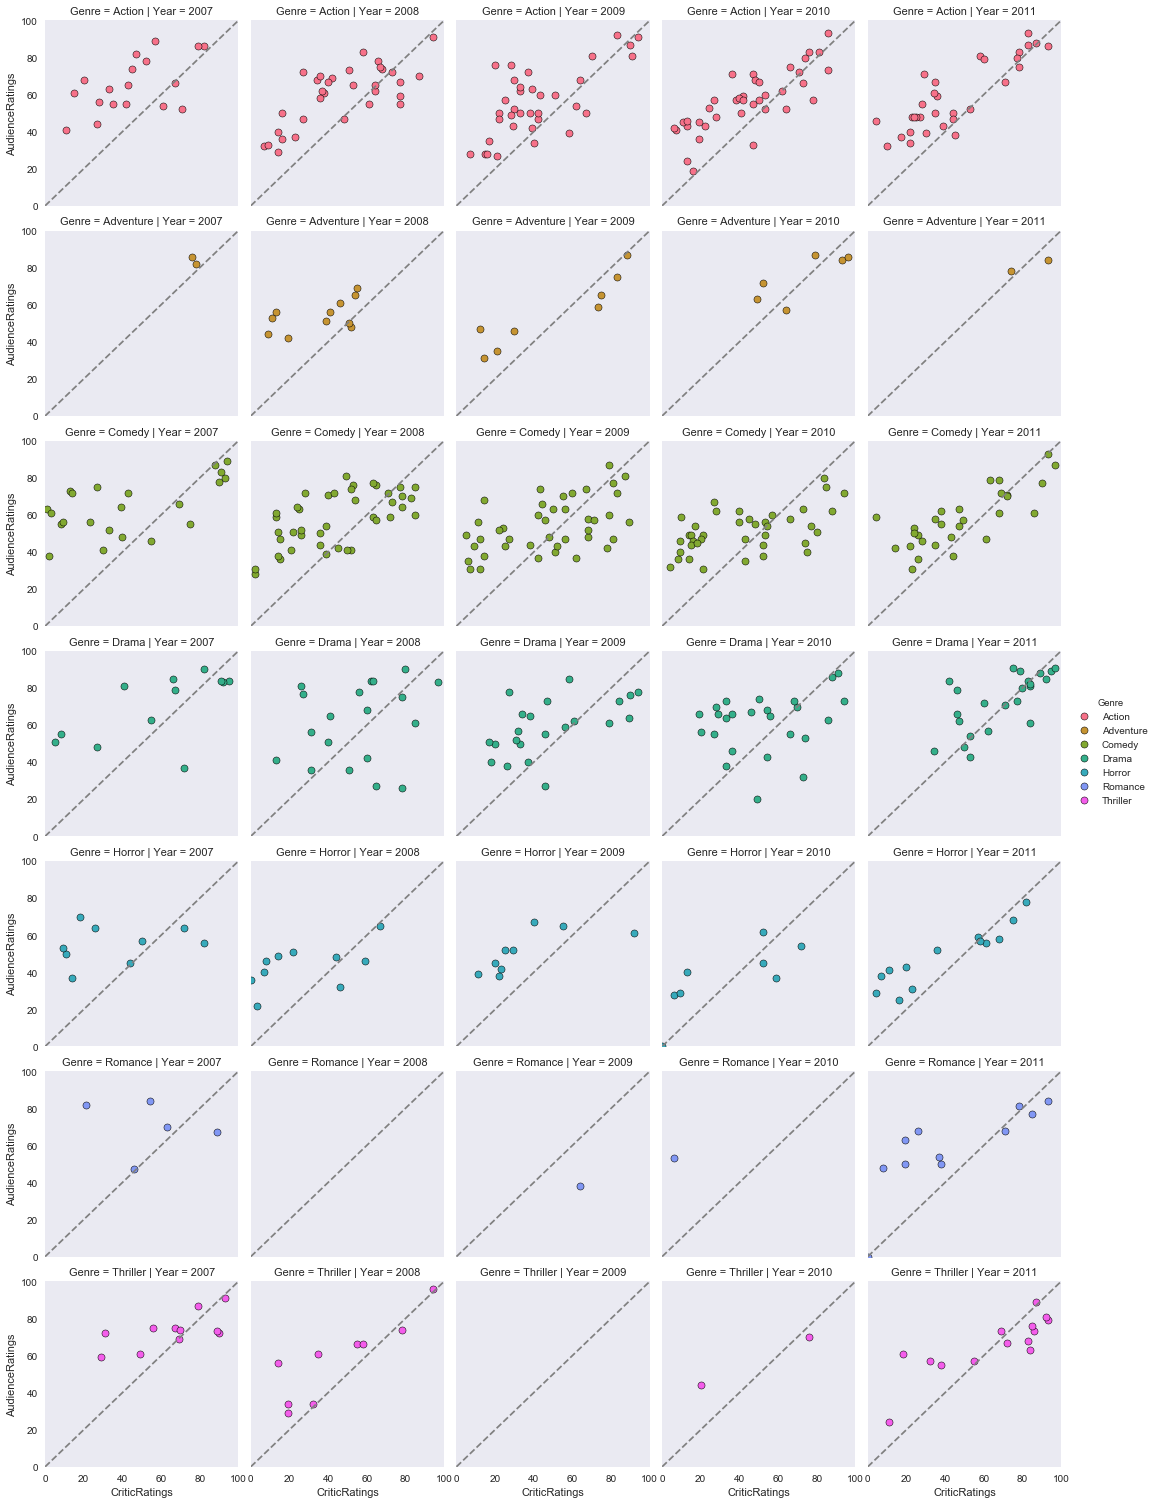

In [59]:
####Lecture 54

###cooordinates and diagonals 
###controlling axisand adding diagonals  

##chart 5
g = sns.FacetGrid(movies, row= "Genre", col = "Year", hue = "Genre")
kws = dict(s=50, linewidth = 0.5, edgecolor = "black")
g =  g.map(plt.scatter, "CriticRatings", "AudienceRatings", **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat: ##this makes an array a list so we can loop
    ax.plot((0,100),(0,100),c="gray", ls="--")
g.add_legend()

In [60]:
####Lecture 55 - Building dashboards in python 

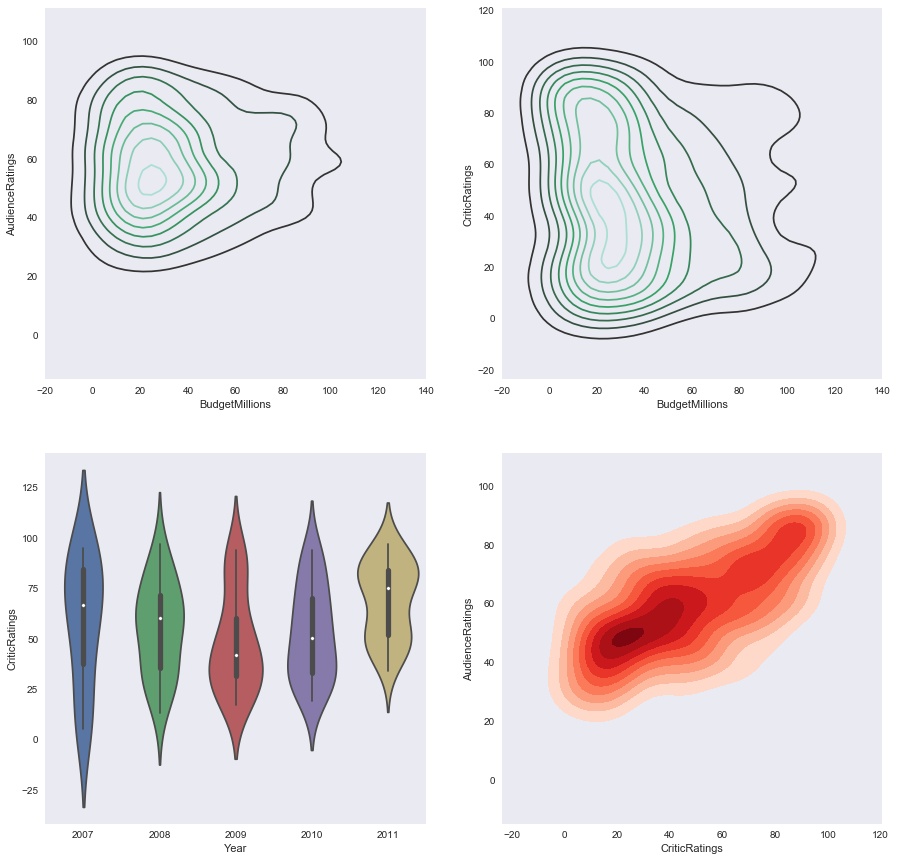

In [61]:
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, ax=axes[0,1])
k1.set(xlim=(-20,140))
k2.set(xlim=(-20,140))
z = sns.violinplot(data=movies[movies.Genre == "Drama"],x="Year", y="CriticRatings", ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,shade=True, shade_lowest = False, cmap = "Reds",ax=axes[1,1])

####non seaborn visuals you have to do something completely different
#axes[1,1].hist(movies.CriticRatings, bins = 30)
plt.show()



In [62]:
####lecture 56 stylig tips

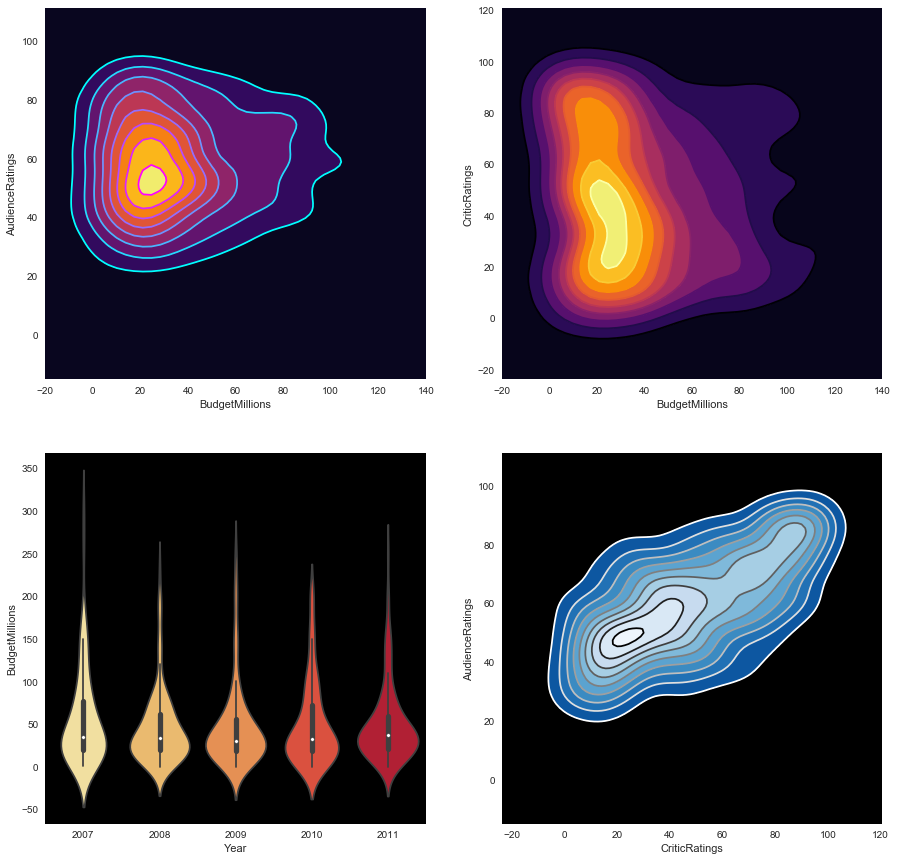

In [63]:
sns.set_style("dark", {"axes.facecolor":"black"}) #white,whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2,2, figsize=(15,15))

#plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, 
                 shade = True, shade_lowest = True,
                 cmap ="inferno",
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRatings, 
                 cmap ="cool", ax=axes[0,0])
                

#plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, 
                 shade = True, shade_lowest = True,
                 cmap ="inferno",                 
                 ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRatings, 
                 cmap ="inferno",                 
                 ax=axes[0,1])


#plot 1,0
z3 = sns.violinplot(data=movies,x="Year", y="BudgetMillions", 
                    ax=axes[1,0],
                    palette="YlOrRd")

#plot 1,1
k4 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,
                 shade=True, shade_lowest = False, 
                 cmap = "Blues_r",ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings, 
                  cmap = "gist_gray_r",ax=axes[1,1])

####non seaborn visuals you have to do something completely different
#axes[1,1].hist(movies.CriticRatings, bins = 30)
k1.set(xlim=(-20,140))
k2.set(xlim=(-20,140))
plt.show()


In [64]:
list1

[2       20
 5      200
 15      35
 29      20
 30      20
 33     237
 36      45
 39      45
 40      70
 45     150
 49      68
 52      17
 58     140
 60      85
 63      40
 66     125
 67      25
 69      40
 70      90
 73      30
 76     163
 77      13
 81      25
 83      20
 86      45
 94      30
 98      33
 101     75
 102     30
 106     45
       ... 
 433    138
 435     50
 439     40
 441     80
 443    150
 448     25
 451     40
 454    145
 458    100
 472    150
 473      6
 474      0
 477    100
 479     75
 493    150
 495     35
 499    150
 500    195
 501    210
 502     30
 504    170
 512     35
 514     95
 528     75
 530     25
 531    130
 542     35
 546    150
 547    160
 557     24
 Name: BudgetMillions, Length: 154, dtype: int64, 1      105
 3       18
 19     200
 21      45
 24      40
 32      78
 46      20
 65      38
 68     140
 130     73
 165     12
 166    125
 167    250
 168    150
 176     36
 178    150
 192     70
 193     60
 24

In [65]:
############lecture 57
#finishing touches

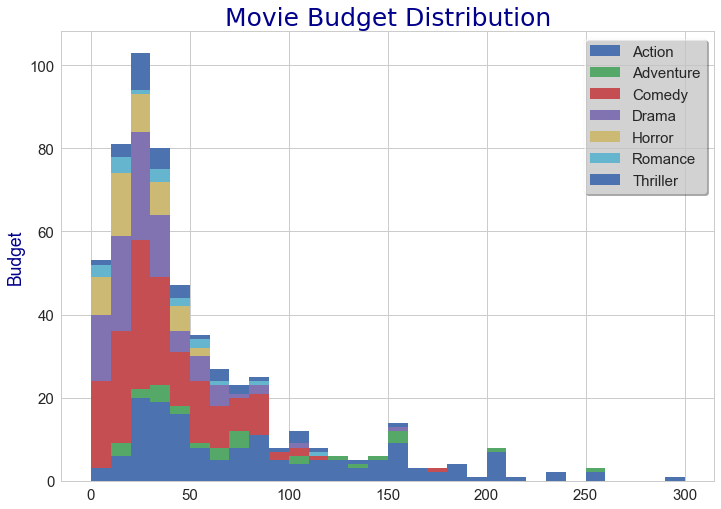

In [66]:
list1 = []
mylabels = []


for gen in gen1:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
h = plt.hist(list1,bins =30, stacked = True, rwidth =1, label = mylabels)
plt.title("Movie Budget Distribution", fontsize =25, color = "DarkBlue",fontname="Console")
plt.ylabel("Number of Movies", fontsize=17.5, color = "Darkblue")
plt.ylabel("Budget", fontsize=17.5, color = "Darkblue")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(prop={"size":15},framealpha=0.5,
           frameon = True, shadow=True, fancybox=True)
plt.show()

In [67]:
###lecture 58 section recap

In [68]:
#category data type in python
#jointplots
#historams
#stacked histograms
#KDE plot
#subplots
#voilin plots
#creating a facet grid
#coordinates and diagonals
#building dashboards
#styling tips
#finishing touches - adding legends and titles

In [69]:
#####Lecture 59 HOMEWORK
###movie percentage domestic gross

#box plot and scatter plot overlayed 

############filter the movies by:###########
#Buena Vista Studios
#Sony
#Universal
#WB
#Paramount Picture
#Fox

#########filter the genre by############
#action 
#comedy
#adventure
#animation
#drama

In [70]:
import pandas as pd 
import os
moviesd = pd.read_csv(r"C:\Users\chida\Desktop\Data Science A-Z\Section 6\Section6-Homework-Data.csv", encoding = 'latin1')

In [71]:
moviesd.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [72]:
moviesd.columns


Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [73]:
moviesd.columns = ['DayofWeek', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate',
       'Studio', 'AdjustedGross', 'Budget', 'Gross',
       'IMDbRating', 'MovieLensRating', 'Overseas', 'OverseasP',
       'Profit', 'ProfitP', 'Runtime', 'US',
       'GrossPUS']

In [74]:
moviesd.columns

Index(['DayofWeek', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate', 'Studio',
       'AdjustedGross', 'Budget', 'Gross', 'IMDbRating', 'MovieLensRating',
       'Overseas', 'OverseasP', 'Profit', 'ProfitP', 'Runtime', 'US',
       'GrossPUS'],
      dtype='object')

In [76]:
#create a subplot

sns.set_style("whitegrid")
fig, ax = plt.subplots(1,6, figsize=(15,15)

#create a boxplot
AllGenres = moviesd.Genre.cat.categories                     
GenreD =[]
studioD = []
                       
                       
for gen in AllGenres:
    GenreD.append(moviesd[moviesd.Genre == gen].GrossPUS)
    mylabels.append(gen)                       
                       
#action 
#comedy
#adventure
#animation
#drama
                       
#bp1 = sns.boxplot(data=moviesd,y="GrossPUS", x="Genre")

#create a scatter plot
#sp1 =

#overlay the two 



####complexities 
#Filter the genres
#Filter the Companies 

###





SyntaxError: invalid syntax (<ipython-input-76-b588c3bf9dbb>, line 7)